**Practice Lab: Linear Regression - Coursera**

**Problem Statement**

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.The chain already has restaurants in various cities and you have data for profits and populations from the cities.

You also have data on cities that are candidates for a new restaurant.

For these cities, you have the city population.

Can you use the data to help you identify which cities may potentially give your business higher profits?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [ ]:
data = np.loadtxt(r"C:\\Users\\ABHIJITH\\Downloads\\ex1data1.txt", delimiter=",")
x_train = data[:, 0]
y_train = data[:, 1]

In [ ]:
print(x_train.shape,y_train.shape)

(97,) (97,)


In [ ]:
print(x_train[:5])
print(len(x_train))

[6.1101 5.5277 8.5186 7.0032 5.8598]
97


In [ ]:
print(y_train[:5])

[17.592   9.1302 13.662  11.854   6.8233]


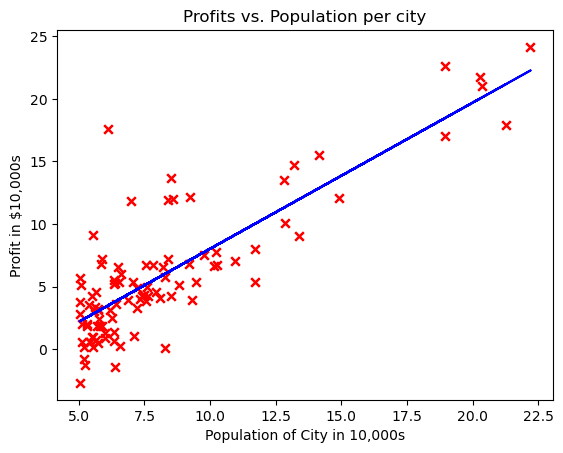

In [ ]:
plt.scatter(x_train,y_train, marker = 'x', c = 'r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [ ]:
def compute_cost(x,y,w,b):
  m=x.shape[0]
  total_cost = 0


  for i in range(m):
    f_wb = w*x[i] + b
    cost = (f_wb - y[i])**2

    total_cost =  cost / (2*m)

  return total_cost

In [ ]:
def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw_i = (f_wb - y[i])*x[i]
    dj_db_i = f_wb - y[i]

    dj_dw = dj_dw + dj_dw_i
    dj_db = dj_db + dj_db_i

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    m = len(x)

    j_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b )
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            cost =  cost_function(x, y, w, b)
            j_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(j_history[-1]):8.2f}   ")

    return w, b, j_history, w_history

In [ ]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     0.05   
Iteration  150: Cost     0.06   
Iteration  300: Cost     0.05   
Iteration  450: Cost     0.04   
Iteration  600: Cost     0.03   
Iteration  750: Cost     0.03   
Iteration  900: Cost     0.03   
Iteration 1050: Cost     0.03   
Iteration 1200: Cost     0.02   
Iteration 1350: Cost     0.02   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

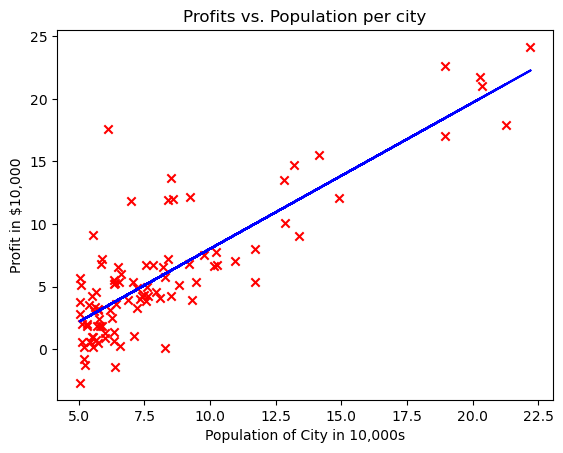

In [ ]:
plt.plot(x_train, predicted, c = "b")
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()